In [59]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [
        [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
        [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
        [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
        [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
        [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
        [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
        [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
        [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
        [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
        [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
        [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
        [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
        [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
    ]
    data["num_vehicles"] = 1
    data["depot"] = 0
    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()} miles")
    index = routing.Start(0)
    plan_output = "Route for vehicle 0:\n"
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += f" {manager.IndexToNode(index)} ->"
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += f" {manager.IndexToNode(index)}\n"
    print(plan_output)
    plan_output += f"Route distance: {route_distance}miles\n"


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == "__main__":
    main()

Objective: 7293 miles
Route for vehicle 0:
 0 -> 7 -> 2 -> 3 -> 4 -> 12 -> 6 -> 8 -> 1 -> 11 -> 10 -> 5 -> 9 -> 0



In [ ]:
#                         '25.01513132581641, 121.53791779632753' ,# 臺大鹿鳴堂東側
#                         '25.013374669243035, 121.53912064475335',# 臺大教研館北側
#                         '25.019805990092692, 121.53588396860172',# 臺大舊體育館西側
#                         '25.017929928175345, 121.54239762420099',# 臺大獸醫館南側

In [2]:
import json
from urllib.request import urlopen
from urllib.parse import quote


def create_data():
    data = {
        'API_key': 'API key',  
        'locations': [
            '25.0129515081496,121.53971739231032', # 臺灣科技大學側門 0
            '25.0118229840727, 121.54168120448969', # 臺灣科技大學後門 1
                       '25.016372883484532,121.54536955505651', #臺大男一舍前 2 
                       '25.017301584315742,121.54531668350012', # 臺大男八舍東側 3
                       '25.02053847784848,121.5414525046573', #臺大社科院西側 4 
                       '25.014625478128043,121.53471143887184', #捷運公館站(2號出口) 5
                       '25.016650154984312,121.54520856017523',#臺大男六舍前 6 
                       '25.017660966704028,121.5403020887202',#臺大第一活動中心西南側 7
                       '25.015375825258296,121.54699752657798',#臺大男七舍前 8
                       '25.011400860857492,121.54066133192484',#公館公園 9
                       '25.015778408267238,121.54292770135469',#臺大動物醫院前 10
                       '25.016171069444606,121.54254135832431',#臺大立體機車停車場 11
                       '25.01427517435295,121.5438950531919',# 臺大醫學院附設癌醫中心 12
                       '25.01874497653938,121.54071874350879',# 臺大工綜館南側 13 
                       '25.021275529017817,121.53590999748414',# 臺大新體育館東南側 14 
                       '25.01451415159743,121.54147700316165' ,# 臺灣科技大學正門 15
                       '25.015517214616406, 121.53374647999274',# 捷運公館站(3號出口) 16
                        '25.01846519396644, 121.53762108416133', # 臺大小福樓東側 17
                        '25.01891200015299, 121.53603966901075' ,# 臺大博理館西側 18
                        '25.015500062173953, 121.53828718425068',# 臺大生命科學館西北側 19
                        '25.01937999597898, 121.53907254742217' ,# 臺大女九舍西南側 20 
                        '25.016899405881674, 121.54032376501375',# 臺大總圖書館西南側 21 
                        '25.019881545461473, 121.54176707782908',# 臺大社會系館南側 22 
                        '25.018581315228726, 121.54252786775004',# 臺大電機二館東南側 23
        ]
    }
    return data

def create_distance_matrix(data):
    locations = data["locations"]
    API_key = data["API_key"]
    max_elements = 100
    num_locations = len(locations)
    max_rows = max_elements // num_locations
    q, r = divmod(num_locations, max_rows)
    dest_locations = locations
    distance_matrix = []

    for i in range(q):
        origin_locations = locations[i * max_rows: (i + 1) * max_rows]
        response = send_request(origin_locations, dest_locations, API_key)
        distance_matrix += build_distance_matrix(response)

    if r > 0:
        origin_locations = locations[q * max_rows: q * max_rows + r]
        response = send_request(origin_locations, dest_locations, API_key)
        distance_matrix += build_distance_matrix(response)

    return distance_matrix

def send_request(origin_locations, dest_locations, API_key):
    def build_location_str(locations):
        return '|'.join([quote(location) for location in locations])

    request = ('https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial'
               '&origins=' + build_location_str(origin_locations) +
               '&destinations=' + build_location_str(dest_locations) +
               '&key=' + API_key)
    
    jsonResult = urlopen(request).read()
    response = json.loads(jsonResult)
    return response

def build_distance_matrix(response):
    return [
        [element['distance']['value'] for element in row['elements']]
        for row in response['rows']
    ]

def main():
    data = create_data()
    distance_matrix = create_distance_matrix(data)
    print(distance_matrix)
    print(len(distance_matrix))

if __name__ == '__main__':
    main()


[[0, 311, 808, 762, 1377, 781, 776, 693, 1004, 240, 469, 1772, 636, 1120, 1853, 263, 919, 1080, 1611, 358, 1051, 669, 1358, 1045], [311, 0, 1099, 1073, 1689, 1092, 1131, 1004, 902, 123, 780, 1461, 703, 1722, 2164, 574, 1230, 1391, 1922, 669, 1362, 980, 1864, 1552], [1410, 1099, 0, 208, 1234, 1560, 32, 683, 197, 1222, 449, 362, 855, 623, 1431, 835, 1698, 957, 1303, 1137, 882, 659, 766, 453], [1953, 1642, 1065, 0, 2299, 2624, 1097, 1748, 868, 1765, 1624, 1427, 1398, 1687, 2496, 2216, 2763, 2021, 2368, 2202, 1946, 1724, 1830, 1517], [2031, 2235, 761, 715, 0, 2013, 729, 675, 958, 2049, 902, 816, 1069, 251, 868, 1288, 2151, 580, 1042, 995, 316, 755, 102, 332], [1701, 1842, 2481, 2435, 1518, 0, 2449, 1086, 2958, 1719, 2142, 2782, 2308, 1260, 1067, 1936, 133, 950, 825, 1420, 1191, 1165, 1511, 1454], [1546, 1131, 32, 176, 1203, 1528, 0, 651, 228, 1254, 417, 331, 887, 591, 1400, 803, 1666, 925, 1271, 1105, 850, 627, 734, 421], [1413, 1554, 683, 637, 685, 1395, 651, 0, 880, 1431, 824, 738, 991, 

In [1]:

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [[0, 311, 808, 762, 1377, 781, 776, 693, 1004, 240, 469, 1772, 636, 1120, 1853, 263, 919, 1080, 1611, 358, 1051, 669, 1358, 1045], [311, 0, 1099, 1073, 1689, 1092, 1131, 1004, 902, 123, 780, 1461, 703, 1722, 2164, 574, 1230, 1391, 1922, 669, 1362, 980, 1864, 1552], [1410, 1099, 0, 208, 1234, 1560, 32, 683, 197, 1222, 449, 362, 855, 623, 1431, 835, 1698, 957, 1303, 1137, 882, 659, 766, 453], [1953, 1642, 1065, 0, 2299, 2624, 1097, 1748, 868, 1765, 1624, 1427, 1398, 1687, 2496, 2216, 2763, 2021, 2368, 2202, 1946, 1724, 1830, 1517], [2031, 2235, 761, 715, 0, 2013, 729, 675, 958, 2049, 902, 816, 1069, 251, 868, 1288, 2151, 580, 1042, 995, 316, 755, 102, 332], [1701, 1842, 2481, 2435, 1518, 0, 2449, 1086, 2958, 1719, 2142, 2782, 2308, 1260, 1067, 1936, 133, 950, 825, 1420, 1191, 1165, 1511, 1454], [1546, 1131, 32, 176, 1203, 1528, 0, 651, 228, 1254, 417, 331, 887, 591, 1400, 803, 1666, 925, 1271, 1105, 850, 627, 734, 421], [1413, 1554, 683, 637, 685, 1395, 651, 0, 880, 1431, 824, 738, 991, 428, 862, 1211, 1534, 387, 620, 335, 358, 80, 679, 503], [1213, 902, 197, 404, 1431, 1756, 228, 880, 0, 1025, 884, 559, 659, 819, 1628, 1032, 1895, 1153, 1500, 1334, 1078, 856, 962, 649], [240, 123, 1222, 1002, 1618, 1070, 1254, 933, 1025, 0, 709, 1584, 826, 1361, 2142, 503, 1208, 1320, 1900, 598, 1291, 909, 1598, 1285], [1749, 1438, 339, 293, 2592, 2590, 307, 2041, 536, 1561, 0, 1720, 1194, 1980, 2789, 2012, 2729, 2314, 2661, 2107, 2239, 2017, 2123, 1810], [1215, 1356, 426, 379, 1794, 1197, 394, 1109, 622, 1233, 87, 0, 253, 1537, 2270, 473, 1336, 1496, 2028, 775, 1467, 1085, 1774, 1462], [1014, 703, 564, 518, 1993, 1396, 533, 1308, 659, 826, 225, 1218, 0, 1478, 2469, 671, 1535, 1695, 2227, 974, 1666, 1284, 1621, 1308], [1892, 1722, 623, 577, 612, 1875, 591, 429, 819, 1911, 764, 677, 931, 0, 809, 1150, 2013, 334, 796, 763, 285, 508, 256, 194], [2276, 2417, 1546, 1500, 661, 2258, 1514, 863, 1743, 2294, 1687, 1601, 1854, 809, 0, 2073, 2396, 727, 242, 1197, 552, 943, 762, 1003], [1384, 1072, 542, 496, 1970, 1373, 510, 1286, 738, 1195, 203, 1587, 370, 1847, 2446, 0, 1512, 1672, 2204, 951, 1643, 1261, 1990, 1678], [1568, 1709, 2347, 2301, 1384, 1733, 2315, 952, 2825, 1586, 2008, 2648, 2175, 1127, 934, 1802, 0, 816, 692, 1287, 1057, 1032, 1378, 1321], [1800, 2055, 957, 910, 591, 1782, 925, 387, 1153, 1818, 1098, 1011, 1265, 334, 727, 1484, 1920, 0, 485, 721, 264, 467, 585, 528], [2034, 2175, 1304, 1258, 1053, 2016, 1272, 621, 1501, 2052, 1445, 1359, 1612, 796, 242, 1831, 2154, 485, 0, 955, 726, 701, 1047, 990], [1078, 1219, 867, 821, 1019, 1061, 835, 335, 1064, 1097, 1519, 922, 1175, 762, 1196, 1313, 1199, 721, 954, 0, 693, 310, 1000, 687], [1772, 2454, 882, 835, 355, 1754, 850, 359, 1078, 1790, 1023, 936, 1190, 285, 552, 1409, 1893, 264, 726, 694, 0, 439, 321, 453], [1389, 1530, 659, 613, 738, 1371, 627, 53, 856, 1407, 800, 714, 967, 481, 915, 1186, 1509, 440, 673, 310, 411, 0, 732, 479], [2398, 2133, 766, 719, 676, 2380, 734, 680, 962, 2256, 1270, 1183, 1436, 256, 873, 1656, 2519, 585, 1047, 1000, 321, 759, 0, 337], [1722, 1552, 453, 407, 806, 1705, 421, 503, 649, 1741, 594, 507, 761, 194, 1003, 980, 1843, 528, 990, 687, 453, 479, 337, 0]]
    data["num_vehicles"] = 3
    data["depot"] = 5
    return data


def print_solution(data, manager, routing, solution):  #列出車輛、路徑、結果
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    max_route_distance = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += f" {manager.IndexToNode(index)} -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f"{manager.IndexToNode(index)}\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print(f"Maximum of the route distances: {max_route_distance}m")



def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # 路徑模型
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # 車輛距離限制.
    dimension_name = "Distance"
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        4000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name,
    )
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print("No solution found !")


if __name__ == "__main__":
    main()

Objective: 380120
Route for vehicle 0:
 0 ->  5 ->  17 ->  18 ->  14 ->  23 ->  21 -> 0
Distance of the route: 3693m

Route for vehicle 1:
 0 ->  16 ->  11 ->  8 ->  3 ->  9 ->  2 ->  6 ->  12 ->  13 ->  1 ->  10 -> 0
Distance of the route: 3506m

Route for vehicle 2:
 0 ->  20 ->  22 ->  7 ->  19 ->  15 ->  4 ->  24 -> 0
Distance of the route: 3621m

Maximum of the route distances: 3693m


In [3]:
import json
from urllib.request import urlopen
from urllib.parse import quote


def create_data():
    data = {
        'API_key': ' API key',  # API key
        'locations': [
            '25.0129515081496,121.53971739231032', # 臺灣科技大學側門 0
            '25.0118229840727, 121.54168120448969', # 臺灣科技大學後門 1
                       '25.016372883484532,121.54536955505651', #臺大男一舍前 2 
                       '25.017301584315742,121.54531668350012', # 臺大男八舍東側 3
                       '25.02053847784848,121.5414525046573', #臺大社科院西側 4 
                       '25.014625478128043,121.53471143887184', #捷運公館站(2號出口) 5
                       '25.016650154984312,121.54520856017523',#臺大男六舍前 6 
                       '25.017660966704028,121.5403020887202',#臺大第一活動中心西南側 7
                       '25.015375825258296,121.54699752657798',#臺大男七舍前 8
                       '25.011400860857492,121.54066133192484',#公館公園 9
                       '25.015778408267238,121.54292770135469',#臺大動物醫院前 10
                       '25.016171069444606,121.54254135832431',#臺大立體機車停車場 11
                       '25.01427517435295,121.5438950531919',# 臺大醫學院附設癌醫中心 12
                       '25.01874497653938,121.54071874350879',# 臺大工綜館南側 13 
                       '25.021275529017817,121.53590999748414',# 臺大新體育館東南側 14 
                       '25.01451415159743,121.54147700316165' ,# 臺灣科技大學正門 15
                       '25.015517214616406, 121.53374647999274',# 捷運公館站(3號出口) 16
                        '25.01846519396644, 121.53762108416133', # 臺大小福樓東側 17
                        '25.01891200015299, 121.53603966901075' ,# 臺大博理館西側 18
                        '25.015500062173953, 121.53828718425068',# 臺大生命科學館西北側 19
                        '25.01937999597898, 121.53907254742217' ,# 臺大女九舍西南側 20 
                        '25.016899405881674, 121.54032376501375',# 臺大總圖書館西南側 21 
                        '25.019881545461473, 121.54176707782908',# 臺大社會系館南側 22 
                        '25.018581315228726, 121.54252786775004',# 臺大電機二館東南側 23
        ]
    }
    return data

def create_distance_matrix(data):
    locations = data["locations"]
    API_key = data["API_key"]
    max_elements = 100
    num_locations = len(locations)
    max_rows = max_elements // num_locations
    q, r = divmod(num_locations, max_rows)
    dest_locations = locations
    distance_matrix = []

    for i in range(q):
        origin_locations = locations[i * max_rows: (i + 1) * max_rows]
        response = send_request(origin_locations, dest_locations, API_key)
        distance_matrix += build_distance_matrix(response)

    if r > 0:
        origin_locations = locations[q * max_rows: q * max_rows + r]
        response = send_request(origin_locations, dest_locations, API_key)
        distance_matrix += build_distance_matrix(response)

    return distance_matrix

def send_request(origin_locations, dest_locations, API_key):
    def build_location_str(locations):
        return '|'.join([quote(location) for location in locations])

    request = ('https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial'
               '&origins=' + build_location_str(origin_locations) +
               '&destinations=' + build_location_str(dest_locations) +
               '&key=' + API_key)
    
    jsonResult = urlopen(request).read()
    response = json.loads(jsonResult)
    return response

def build_distance_matrix(response):
    return [
        [element['duration']['value'] for element in row['elements']]
        for row in response['rows']
    ]

def main():
    data = create_data()
    time_matrix = create_distance_matrix(data)
    print(time_matrix)
    print(len(time_matrix))

if __name__ == '__main__':
    main()


[[0, 68, 126, 104, 390, 131, 118, 208, 162, 61, 65, 340, 109, 313, 395, 40, 148, 314, 324, 120, 296, 206, 384, 309], [75, 0, 174, 179, 465, 206, 182, 283, 139, 27, 140, 272, 123, 387, 471, 116, 223, 389, 399, 195, 371, 281, 421, 347], [265, 190, 0, 77, 378, 256, 9, 221, 36, 217, 172, 99, 153, 214, 455, 220, 273, 318, 371, 251, 280, 220, 247, 173], [344, 269, 192, 0, 570, 448, 200, 413, 157, 296, 326, 291, 232, 405, 646, 385, 464, 510, 562, 442, 472, 411, 439, 365], [429, 420, 268, 244, 0, 396, 261, 177, 304, 432, 312, 239, 341, 72, 261, 361, 413, 175, 263, 278, 81, 204, 22, 101], [379, 404, 483, 461, 352, 0, 476, 236, 464, 382, 422, 398, 466, 276, 264, 398, 16, 220, 192, 326, 258, 263, 336, 331], [281, 197, 7, 69, 370, 247, 0, 213, 43, 224, 163, 90, 160, 205, 446, 212, 264, 309, 362, 242, 272, 211, 239, 165], [360, 385, 224, 200, 181, 327, 217, 0, 260, 363, 268, 195, 297, 105, 221, 316, 343, 105, 149, 90, 87, 26, 165, 139], [229, 154, 34, 111, 413, 290, 43, 256, 0, 181, 211, 133, 116, 

# CVRP 

In [8]:
"""Capacited Vehicles Routing Problem (CVRP)."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [[0, 311, 808, 762, 1377, 781, 776, 693, 1004, 240, 469, 1772, 636, 1120, 1853, 263, 919, 1080, 1611, 358, 1051, 669, 1358, 1045], [311, 0, 1099, 1073, 1689, 1092, 1131, 1004, 902, 123, 780, 1461, 703, 1722, 2164, 574, 1230, 1391, 1922, 669, 1362, 980, 1864, 1552], 
                               [1410, 1099, 0, 208, 1234, 1560, 32, 683, 197, 1222, 449, 362, 855, 623, 1431, 835, 1698, 957, 1303, 1137, 882, 659, 766, 453], [1953, 1642, 1065, 0, 2299, 2624, 1097, 1748, 868, 1765, 1624, 1427, 1398, 1687, 2496, 2216, 2763, 2021, 2368, 2202, 1946, 1724, 1830, 1517], 
                               [2031, 2235, 761, 715, 0, 2013, 729, 675, 958, 2049, 902, 816, 1069, 251, 868, 1288, 2151, 580, 1042, 995, 316, 755, 102, 332], 
                               [1701, 1842, 2481, 2435, 1518, 0, 2449, 1086, 2958, 1719, 2142, 2782, 2308, 1260, 1067, 1936, 133, 950, 825, 1420, 1191, 1165, 1511, 1454], 
                               [1546, 1131, 32, 176, 1203, 1528, 0, 651, 228, 1254, 417, 331, 887, 591, 1400, 803, 1666, 925, 1271, 1105, 850, 627, 734, 421], [1413, 1554, 683, 637, 685, 1395, 651, 0, 880, 1431, 824, 738, 991, 428, 862, 1211, 1534, 387, 620, 335, 358, 80, 679, 503], 
                               [1213, 902, 197, 404, 1431, 1756, 228, 880, 0, 1025, 884, 559, 659, 819, 1628, 1032, 1895, 1153, 1500, 1334, 1078, 856, 962, 649], [240, 123, 1222, 1002, 1618, 1070, 1254, 933, 1025, 0, 709, 1584, 826, 1361, 2142, 503, 1208, 1320, 1900, 598, 1291, 909, 1598, 1285], 
                               [1749, 1438, 339, 293, 2592, 2590, 307, 2041, 536, 1561, 0, 1720, 1194, 1980, 2789, 2012, 2729, 2314, 2661, 2107, 2239, 2017, 2123, 1810], 
                               [1215, 1356, 426, 379, 1794, 1197, 394, 1109, 622, 1233, 87, 0, 253, 1537, 2270, 473, 1336, 1496, 2028, 775, 1467, 1085, 1774, 1462],
                               [1014, 703, 564, 518, 1993, 1396, 533, 1308, 659, 826, 225, 1218, 0, 1478, 2469, 671, 1535, 1695, 2227, 974, 1666, 1284, 1621, 1308], 
                               [1892, 1722, 623, 577, 612, 1875, 591, 429, 819, 1911, 764, 677, 931, 0, 809, 1150, 2013, 334, 796, 763, 285, 508, 256, 194],
                               [2276, 2417, 1546, 1500, 661, 2258, 1514, 863, 1743, 2294, 1687, 1601, 1854, 809, 0, 2073, 2396, 727, 242, 1197, 552, 943, 762, 1003], 
                               [1384, 1072, 542, 496, 1970, 1373, 510, 1286, 738, 1195, 203, 1587, 370, 1847, 2446, 0, 1512, 1672, 2204, 951, 1643, 1261, 1990, 1678],
                               [1568, 1709, 2347, 2301, 1384, 1733, 2315, 952, 2825, 1586, 2008, 2648, 2175, 1127, 934, 1802, 0, 816, 692, 1287, 1057, 1032, 1378, 1321], [1800, 2055, 957, 910, 591, 1782, 925, 387, 1153, 1818, 1098, 1011, 1265, 334, 727, 1484, 1920, 0, 485, 721, 264, 467, 585, 528], 
                               [2034, 2175, 1304, 1258, 1053, 2016, 1272, 621, 1501, 2052, 1445, 1359, 1612, 796, 242, 1831, 2154, 485, 0, 955, 726, 701, 1047, 990], 
                               [1078, 1219, 867, 821, 1019, 1061, 835, 335, 1064, 1097, 1519, 922, 1175, 762, 1196, 1313, 1199, 721, 954, 0, 693, 310, 1000, 687], 
                               [1772, 2454, 882, 835, 355, 1754, 850, 359, 1078, 1790, 1023, 936, 1190, 285, 552, 1409, 1893, 264, 726, 694, 0, 439, 321, 453], 
                               [1389, 1530, 659, 613, 738, 1371, 627, 53, 856, 1407, 800, 714, 967, 481, 915, 1186, 1509, 440, 673, 310, 411, 0, 732, 479], 
                               [2398, 2133, 766, 719, 676, 2380, 734, 680, 962, 2256, 1270, 1183, 1436, 256, 873, 1656, 2519, 585, 1047, 1000, 321, 759, 0, 337], 
                               [1722, 1552, 453, 407, 806, 1705, 421, 503, 649, 1741, 594, 507, 761, 194, 1003, 980, 1843, 528, 990, 687, 453, 479, 337, 0]]
    
    data["time_matrix"] = [[0, 68, 126, 104, 390, 131, 118, 208, 162, 61, 65, 340, 109, 313, 395, 40, 148, 314, 324, 120, 296, 206, 384, 309], [75, 0, 174, 179, 465, 206, 182, 283, 139, 27, 140, 272, 123, 387, 471, 116, 223, 389, 399, 195, 371, 281, 421, 347], [265, 190, 0, 77, 378, 256, 9, 221, 36, 217, 172, 99, 153, 214, 455, 220, 273, 318, 371, 251, 280, 220, 247, 173], [344, 269, 192, 0, 570, 448, 200, 413, 157, 296, 326, 291, 232, 405, 646, 385, 464, 510, 562, 442, 472, 411, 439, 365], [429, 420, 268, 244, 0, 396, 261, 177, 304, 432, 312, 239, 341, 72, 261, 361, 413, 175, 263, 278, 81, 204, 22, 101], [379, 404, 483, 461, 352, 0, 476, 236, 464, 382, 422, 398, 466, 276, 264, 398, 16, 220, 192, 326, 258, 263, 336, 331], [281, 197, 7, 69, 370, 247, 0, 213, 43, 224, 163, 90, 160, 205, 446, 212, 264, 309, 362, 242, 272, 211, 239, 165], [360, 385, 224, 200, 181, 327, 217, 0, 260, 363, 268, 195, 297, 105, 221, 316, 343, 105, 149, 90, 87, 26, 165, 139], [229, 154, 34, 111, 413, 290, 43, 256, 0, 181, 211, 133, 116, 248, 489, 255, 307, 352, 405, 285, 314, 254, 281, 207], [69, 22, 196, 173, 459, 194, 204, 277, 161, 0, 134, 294, 145, 382, 458, 109, 210, 383, 386, 189, 365, 275, 452, 378], [326, 251, 61, 39, 609, 470, 54, 452, 97, 278, 0, 330, 214, 445, 685, 367, 486, 549, 601, 446, 511, 450, 478, 404], [190, 215, 134, 112, 422, 157, 127, 240, 170, 193, 73, 0, 102, 345, 422, 122, 174, 345, 350, 152, 327, 238, 415, 341], [218, 143, 155, 133, 520, 256, 148, 338, 126, 170, 94, 260, 0, 375, 520, 220, 272, 444, 448, 250, 426, 337, 408, 334], [383, 413, 223, 199, 165, 350, 215, 107, 258, 386, 266, 193, 295, 0, 241, 315, 367, 104, 192, 197, 71, 134, 62, 55], [570, 595, 435, 411, 197, 537, 427, 210, 470, 573, 478, 405, 507, 237, 0, 527, 554, 194, 64, 300, 168, 237, 221, 292], [286, 211, 85, 63, 512, 248, 78, 330, 121, 238, 24, 328, 68, 443, 512, 0, 264, 436, 440, 242, 418, 329, 476, 402], [363, 388, 467, 445, 336, 378, 460, 220, 448, 366, 406, 382, 450, 260, 248, 382, 0, 204, 176, 311, 242, 247, 320, 315], [472, 506, 316, 292, 170, 439, 308, 112, 351, 475, 359, 286, 388, 93, 218, 408, 455, 0, 147, 202, 76, 139, 153, 148], [506, 531, 371, 347, 262, 473, 364, 146, 407, 509, 415, 342, 444, 186, 72, 463, 490, 130, 0, 236, 168, 173, 246, 241], [270, 295, 274, 250, 270, 237, 267, 88, 310, 273, 314, 245, 347, 193, 309, 289, 253, 194, 237, 0, 176, 86, 263, 189], [455, 474, 299, 275, 102, 422, 292, 94, 335, 458, 343, 270, 372, 77, 178, 392, 438, 92, 180, 185, 0, 122, 76, 131], [359, 384, 224, 200, 202, 326, 217, 20, 260, 362, 268, 195, 297, 126, 241, 316, 343, 126, 170, 89, 108, 0, 186, 139], [410, 398, 260, 236, 177, 377, 253, 169, 296, 425, 293, 220, 322, 64, 253, 341, 393, 166, 255, 270, 72, 196, 0, 92], [335, 364, 174, 150, 212, 302, 166, 131, 210, 338, 218, 144, 247, 47, 288, 266, 318, 151, 239, 183, 113, 130, 80, 0]]
    data["demands"] = [-3,11,3,3,-5,5,-4,-3,-3,-1,7,1,-2,-5,-2,5,5,2,-3,2,1,-2,-2,9,1]
    data["vehicle_capacities"] = [16, 24, 24]
    data["initial_loads"] = data["vehicle_capacities"].copy()
    data["num_vehicles"] = 3
    data["depot"] = 5
    return data

def print_solution(data, manager, routing, solution):
    """print出車輛的路徑、距離、時間、容量等資訊"""
    print(f"Objective: {solution.ObjectiveValue()}")
    total_distance = 0
    total_load = 0
    total_time = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        route_time = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
            route_time += data["time_matrix"][manager.IndexToNode(previous_index)][manager.IndexToNode(index)]
            route_time += abs(data["demands"][node_index]) * 30  # 使用絕對值，每一單位的需求增加30秒
        route_time_minutes = route_time / 60  # 將秒數轉換為分鐘
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Time of the route: {route_time_minutes:.2f} minutes\n"  # 顯示時間（以分鐘為單位）
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
        total_time += route_time
    total_time_minutes = total_time / 60  # 將總秒數轉換為分鐘
    print(f"Total distance of all routes: {total_distance}m")
    print(f"Total load of all routes: {total_load}")
    print(f"Total time of all routes: {total_time_minutes:.2f} minutes")



def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )
    
    maximum_distance = 6000
    routing.AddDimension(
        transit_callback_index,  # transit callback
        0,  # slack
        maximum_distance,  # maximum distance per vehicle
        True,  # start cumul to zero
        'Distance'
    )

    
    
    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PARALLEL_CHEAPEST_INSERTION
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.SIMULATED_ANNEALING 
    )
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found!')
        print(sum(data["demands"]))


if __name__ == "__main__":
    main()

Objective: 13869
Route for vehicle 0:
 5 Load(5) ->  14 Load(3) ->  18 Load(0) ->  19 Load(2) ->  5 Load(2)
Distance of the route: 3325m
Time of the route: 19.35 minutes
Load of the route: 2

Route for vehicle 1:
 5 Load(5) ->  9 Load(4) ->  1 Load(15) ->  0 Load(12) ->  15 Load(17) ->  12 Load(15) ->  10 Load(22) ->  6 Load(18) ->  21 Load(16) ->  7 Load(13) ->  5 Load(13)
Distance of the route: 5393m
Time of the route: 43.05 minutes
Load of the route: 13

Route for vehicle 2:
 5 Load(5) ->  16 Load(10) ->  17 Load(12) ->  20 Load(13) ->  4 Load(8) ->  22 Load(6) ->  13 Load(1) ->  23 Load(10) ->  3 Load(13) ->  8 Load(10) ->  2 Load(13) ->  11 Load(14) ->  5 Load(14)
Distance of the route: 5151m
Time of the route: 40.93 minutes
Load of the route: 14

Total distance of all routes: 13869m
Total load of all routes: 29
Total time of all routes: 103.33 minutes


In [1]:
"""Capacited Vehicles Routing Problem (CVRP)."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [
        [0, 311, 808, 762, 1377, 781, 776, 693, 718, 1004, 240, 469, 1772, 636, 1120, 1853, 263, 919, 1080, 1611, 358, 1051, 669, 1358, 1045]
        , [311, 0, 1099, 1073, 1689, 1092, 1131, 1004, 1029, 902, 123, 780, 1461, 703, 1721, 2164, 574, 1230, 1391, 1922, 669, 1362, 980, 1864, 1552]
        , [1410, 1099, 0, 208, 1234, 1560, 32, 683, 164, 197, 1222, 449, 362, 855, 622, 1431, 835, 1698, 956, 1303, 867, 881, 659, 765, 453]
        , [1953, 1642, 1065, 0, 2299, 2624, 1096, 1748, 1229, 868, 1765, 1624, 1427, 1398, 1687, 2496, 2216, 2763, 2021, 2368, 1932, 1946, 1724, 1830, 1517]
        , [1368, 2235, 761, 715, 0, 2013, 729, 675, 671, 958, 2358, 902, 816, 1069, 251, 868, 1288, 2151, 580, 1042, 1010, 316, 755, 102, 332]
        , [1701, 1842, 3155, 2435, 1518, 0, 3187, 1086, 2391, 2958, 1719, 2142, 2782, 2308, 1260, 1067, 1936, 133, 950, 825, 1420, 1191, 1165, 1511, 1454]
        , [1442, 1131, 32, 176, 1203, 1528, 0, 651, 132, 228, 1253, 417, 331, 887, 591, 1400, 803, 1666, 925, 1271, 835, 850, 627, 734, 421]
        , [693, 1004, 683, 637, 685, 1395, 651, 0, 593, 880, 933, 1134, 738, 991, 428, 882, 928, 1534, 387, 620, 335, 358, 80, 679, 503]
        , [1997, 1686, 1108, 44, 2343, 2668, 1140, 1792, 0, 912, 1808, 1667, 1471, 1442, 1731, 2540, 2260, 2807, 2065, 2411, 1975, 1990, 1768, 1874, 1561]
        , [1213, 902, 197, 404, 1431, 1756, 228, 880, 361, 0, 1025, 884, 559, 659, 819, 1628, 1032, 1895, 1153, 1500, 1064, 1078, 856, 962, 649]
        , [240, 123, 1222, 1002, 1618, 1070, 1253, 933, 958, 1025, 0, 709, 1584, 826, 1361, 2142, 503, 1208, 1320, 1900, 598, 1291, 909, 1598, 1285]
        , [1749, 1438, 339, 293, 2592, 2590, 307, 2041, 249, 536, 1561, 0, 1720, 1194, 1980, 2789, 2012, 2729, 2314, 2661, 2107, 2239, 2017, 2123, 1810]
        , [1215, 1356, 425, 379, 1794, 1197, 394, 1109, 336, 622, 1233, 87, 0, 253, 1537, 2270, 473, 1336, 1496, 2028, 775, 1467, 1085, 1774, 1462]
        , [1014, 703, 564, 518, 1993, 1396, 533, 1308, 475, 659, 826, 225, 1218, 0, 1478, 2469, 671, 1535, 1695, 2227, 974, 1666, 1284, 1621, 1308]
        , [1122, 1433, 622, 577, 612, 1875, 591, 429, 533, 819, 1362, 764, 677, 931, 0, 809, 1150, 2013, 334, 796, 763, 285, 508, 256, 194]
        , [1556, 1867, 1546, 1500, 661, 2258, 1514, 863, 1456, 1743, 1796, 1996, 1601, 1854, 809, 0, 1790, 2396, 727, 242, 1197, 552, 943, 762, 1003]
        , [1384, 1072, 542, 496, 1970, 1373, 510, 1286, 452, 738, 1195, 203, 1587, 370, 1847, 2446, 0, 1512, 1672, 2204, 951, 1643, 1261, 1990, 1677]
        , [1568, 1709, 3021, 2301, 1384, 1733, 3053, 952, 2257, 2825, 1586, 2008, 2648, 2175, 1127, 934, 1802, 0, 816, 692, 1287, 1057, 1032, 1378, 1321]
        , [1080, 1391, 956, 910, 591, 1782, 925, 387, 867, 1153, 1320, 1520, 1011, 1265, 334, 727, 1314, 1920, 0, 485, 721, 264, 467, 585, 528]
        , [1314, 1625, 1304, 1258, 1053, 2016, 1272, 621, 1214, 1501, 1554, 1754, 1359, 1612, 796, 242, 1549, 2154, 485, 0, 955, 726, 701, 1047, 990]
        , [358, 669, 867, 821, 1019, 1061, 835, 335, 777, 1064, 598, 799, 922, 966, 762, 1216, 593, 1199, 721, 954, 0, 693, 310, 1000, 687]
        , [1052, 1363, 881, 835, 355, 1754, 850, 359, 792, 1078, 1292, 1493, 936, 1190, 285, 552, 1287, 1893, 264, 726, 694, 0, 439, 321, 453]
        , [669, 980, 659, 613, 738, 1371, 627, 53, 569, 856, 909, 1109, 714, 967, 481, 935, 904, 1509, 440, 673, 310, 411, 0, 732, 479]
        , [1373, 2133, 765, 719, 676, 2380, 734, 680, 676, 1359, 2256, 1270, 1183, 1436, 256, 873, 1656, 2519, 585, 1047, 1014, 321, 759, 0, 337]
        , [1045, 1552, 453, 407, 806, 1705, 421, 503, 363, 649, 1741, 594, 507, 761, 194, 1003, 980, 1843, 528, 990, 687, 453, 479, 337, 0]]
    data["demands"] = [25,-1,-1,-5,-4,25,-4,-3,-8,-1,-2,5,6,-4,-2,5,-3,-2,-3,-2,8,-4,-2,25,-1]
    data["vehicle_capacities"] = [25,25,25]
    data["initial_loads"] = data["vehicle_capacities"].copy()
    data["num_vehicles"] = 3
    data["depot"] = 5
    return data




def print_solution(data, manager, routing, assignment):
    """Prints assignment on console."""
    print(f"Objective: {assignment.ObjectiveValue()}")
    # Display dropped nodes.
    dropped_nodes = "Dropped nodes:"
    for node in range(routing.Size()):
        if routing.IsStart(node) or routing.IsEnd(node):
            continue
        if assignment.Value(routing.NextVar(node)) == node:
            dropped_nodes += f" {manager.IndexToNode(node)}"
    print(dropped_nodes)
    # Display routes
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = assignment.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print(f"Total Distance of all routes: {total_distance}m")
    print(f"Total Load of all routes: {total_load}")


def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )
    # Allow to drop nodes.
    penalty = 1000
    for node in range(1, len(data["distance_matrix"])):
        routing.AddDisjunction([manager.NodeToIndex(node)], penalty)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PARALLEL_CHEAPEST_INSERTION
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.SIMULATED_ANNEALING 
    )
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    assignment = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if assignment:
        print_solution(data, manager, routing, assignment)


if __name__ == "__main__":
    main()

In [2]:
pip install folium

  Using cached folium-0.15.0-py2.py3-none-any.whl (100 kB)
  Using cached branca-0.7.0-py3-none-any.whl (25 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import folium

# Latitude and longitude of locations
locations = [
    [25.0129515081496, 121.53971739231032], # 臺灣科技大學側門 0
    [25.0118229840727, 121.54168120448969], # 臺灣科技大學後門 1
    [25.016372883484532,121.54536955505651], # 臺大男一舍前 2 
    [25.017301584315742,121.54531668350012], # 臺大男八舍東側 3
    [25.02053847784848,121.5414525046573], # 臺大社科院西側 4 
    [25.014625478128043,121.53471143887184], # 捷運公館站(2號出口) 5
    [25.016650154984312,121.54520856017523],# 臺大男六舍前 6 
    [25.017660966704028,121.5403020887202],# 臺大第一活動中心西南側 7
    [25.015375825258296,121.54699752657798],# 臺大男七舍前 8
    [25.011400860857492,121.54066133192484],# 公館公園 9
    [25.015778408267238,121.54292770135469],# 臺大動物醫院前 10
    [25.016171069444606,121.54254135832431],# 臺大立體機車停車場 11
    [25.01427517435295,121.5438950531919],# 臺大醫學院附設癌醫中心 12
    [25.01874497653938,121.54071874350879],# 臺大工綜館南側 13 
    [25.021275529017817,121.53590999748414],# 臺大新體育館東南側 14 
    [25.01451415159743,121.54147700316165], # 臺灣科技大學正門 15
    [25.015517214616406, 121.53374647999274],# 捷運公館站(3號出口) 16
    [25.01846519396644, 121.53762108416133], # 臺大小福樓東側 17
    [25.01891200015299, 121.53603966901075], # 臺大博理館西側 18
    [25.015500062173953, 121.53828718425068],# 臺大生命科學館西北側 19
    [25.01937999597898, 121.53907254742217], # 臺大女九舍西南側 20 
    [25.016899405881674, 121.54032376501375],# 臺大總圖書館西南側 21 
    [25.019881545461473, 121.54176707782908],# 臺大社會系館南側 22 
    [25.018581315228726, 121.54252786775004] # 臺大電機二館東南側 23
]

# Create a map centered around the average latitude and longitude
map_center = [sum(l[0] for l in locations) / len(locations), sum(l[1] for l in locations) / len(locations)]
m = folium.Map(location=map_center, zoom_start=15)

# Add markers to the map
for i, location in enumerate(locations):
    folium.Marker(location, popup=f"Location {i}").add_to(m)

# Save the map to an HTML file
map_file = 'taiwan_university_map.html'
m.save(map_file)

map_file


'taiwan_university_map.html'

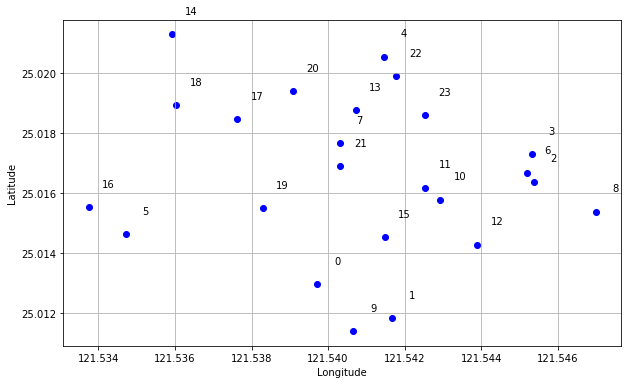

In [16]:
# Creating the plot without the offset in axis labels
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c='blue', marker='o')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

# Adjusting the axis to show the actual latitude and longitude values without the offset
plt.gca().ticklabel_format(useOffset=False, style='plain')

# Adding labels
for label, x, y in zip(labels, longitudes, latitudes):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(20,20), ha='center')
plot_file = 'plot.jpg'
plt.savefig(plot_file,dpi = 250)

# Showing the plot
plt.show()
